In [204]:
import pandas as pd
df = pd.read_pickle("../../../data_preprocessing/cri_compustat_merged_v8.pkl")
df.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,42404,2000.0,1,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,37610,2000.0,1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,49536,2000.0,1,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,32417,2000.0,1,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,44933,2000.0,1,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [205]:
# Unnecessary cols
labels_to_drop = [
    'CompNo',
    'year',
    'month',
    'dummy297fin',
    'day',
    'StartDate',  
    'EventDate', 
    'gvkey',
    'tic'
]
df = df.drop(labels_to_drop, axis=1)
df.head()

,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,ni2tatrend,sizelevel,sizetrend,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,0.089239,0.011089,0.677551,0.332808,1.411466,0.027249,-0.148249,0.079108,-5.559146,1.222586,...,197946.597222,0.000000,-5.000000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-149041.103448,-297211.000000
1,0.089239,0.011089,0.087376,-0.524732,0.906364,-0.071829,0.000292,0.000139,-2.027446,-0.648054,...,190.722132,2.177571,-1.220833,0.0,1.0,2.498284e+01,-7.402171e+01,-6.856532e+01,-0.904380,1.490291
2,0.313050,0.007314,3.693176,0.625516,1.872712,1.010148,-0.069998,0.038957,1.492078,1.699079,...,0.000000,0.036899,-78.333333,-0.0,1.0,7.542644e+01,-2.309701e+02,-1.503731e+02,-11.081841,-430.222222
3,0.089239,0.011089,6.165654,0.863910,1.275166,0.184606,0.013360,0.000300,0.249383,0.328536,...,269.176235,0.551135,66.510333,0.0,1.0,5.234158e+01,-2.327468e+01,-1.952816e+01,-395.933333,777.750000
4,0.089239,0.011089,0.629410,-0.874122,0.000000,0.000000,0.004436,-0.007812,-2.133248,-0.210920,...,0.000000,-2.766467,19.196429,0.0,1.0,7.495250e+01,3.133312e+01,4.316023e+01,0.020216,2.013002


In [156]:
# # Format Duration col
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.replace(r'\s', '', regex=True)
df['Duration'] = df['Duration'].str.split('days').str[0]
df['Duration'] = df['Duration'].astype('float32')

In [207]:
from pycox.models import BCESurv, LogisticHazard
from pycox.evaluation import EvalSurv
import numpy as np
import torchtuples as tt

In [208]:

import datetime
date2022 = datetime.datetime(2022, 1, 1)
date2020 = datetime.datetime(2020,1,1)
df_train = df[df["date"] < date2020]
df_val = df[(df["date"] >= date2020) & (df["date"] < date2022)]
df_test = df[df["date"] >= date2022]

In [209]:
df_train.drop('date', axis=1, inplace=True)
df_val.drop('date', axis=1, inplace=True)
df_test.drop('date', axis=1, inplace=True)

/var/folders/kp/rt42wzwx7sz9plr9l175fkv40000gn/T/ipykernel_63217/1333629358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('date', axis=1, inplace=True)
/var/folders/kp/rt42wzwx7sz9plr9l175fkv40000gn/T/ipykernel_63217/1333629358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.drop('date', axis=1, inplace=True)
/var/folders/kp/rt42wzwx7sz9plr9l175fkv40000gn/T/ipykernel_63217/1333629358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [210]:
x_train = df_train.drop(['Duration', 'Default'], axis=1)
x_val = df_val.drop(['Duration', 'Default'], axis=1)
x_test = df_test.drop(['Duration', 'Default'], axis=1)

In [211]:
x_train = x_train.astype('float32')
x_train = x_train.values
x_val = x_val.astype('float32')
x_val = x_val.values
x_test = x_test.astype('float32')
x_test = x_test.values

In [212]:
# get y train and y val
num_durations = 10
labtrans = BCESurv.label_transform(num_durations)
get_target = lambda df: (df['Duration'].values, df['Default'].values)
y_train = labtrans.fit_transform(*get_target(df_train))
y_val = labtrans.transform(*get_target(df_val))

In [213]:
# Get training set
train = (x_train, y_train)
val = (x_val, y_val)
# We don't need to transform the test labels
durations_test, events_test = get_target(df_test)

In [214]:
in_features = x_train.shape[1]
num_nodes = [32, 32]
out_features = labtrans.out_features
batch_norm = True
dropout = 0.1

net = tt.practical.MLPVanilla(in_features, num_nodes, out_features, batch_norm, dropout)
model = BCESurv(net, tt.optim.Adam, duration_index=labtrans.cuts)

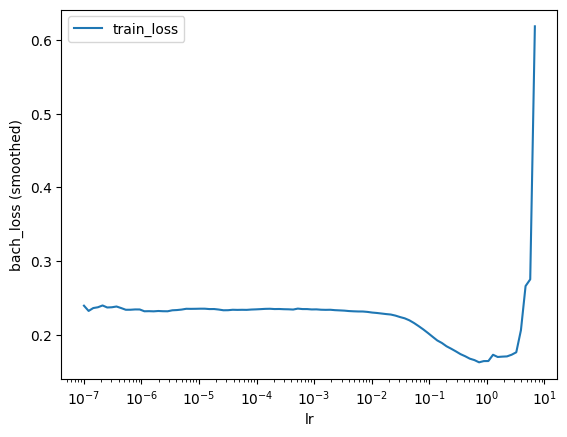

In [215]:
batch_size = 256
lr_finder = model.lr_finder(x_train, y_train, batch_size, tolerance=3)
_ = lr_finder.plot()

In [216]:
lr_finder.get_best_lr()

0.07390722033525823

In [217]:
model.optimizer.set_lr(0.01)

In [218]:
epochs = 100
callbacks = [tt.callbacks.EarlyStopping()]
log = model.fit(x_train, y_train, batch_size, epochs, callbacks, val_data=val)

0:	[7s / 7s],		train_loss: 0.0160,	val_loss: 0.0670
1:	[7s / 14s],		train_loss: 0.0142,	val_loss: 0.0649
2:	[7s / 21s],		train_loss: 0.0138,	val_loss: 0.0551
3:	[7s / 28s],		train_loss: 0.0136,	val_loss: 0.0330
4:	[7s / 35s],		train_loss: 0.0132,	val_loss: 0.0589
5:	[7s / 42s],		train_loss: 0.0131,	val_loss: 0.0381
6:	[7s / 50s],		train_loss: 0.0133,	val_loss: 0.0397
7:	[7s / 57s],		train_loss: 0.0128,	val_loss: 0.0549
8:	[7s / 1m:4s],		train_loss: 0.0126,	val_loss: 0.0452
9:	[7s / 1m:11s],		train_loss: 0.0128,	val_loss: 0.0409
10:	[7s / 1m:18s],		train_loss: 0.0125,	val_loss: 0.0331
11:	[7s / 1m:26s],		train_loss: 0.0128,	val_loss: 0.0441
12:	[7s / 1m:33s],		train_loss: 0.0124,	val_loss: 0.0301
13:	[7s / 1m:41s],		train_loss: 0.0124,	val_loss: 0.0495
14:	[7s / 1m:48s],		train_loss: 0.0124,	val_loss: 0.0541
15:	[7s / 1m:56s],		train_loss: 0.0122,	val_loss: 0.0323
16:	[7s / 2m:3s],		train_loss: 0.0122,	val_loss: 0.0304
17:	[7s / 2m:11s],		train_loss: 0.0120,	val_loss: 0.0427
18:	[7s / 2

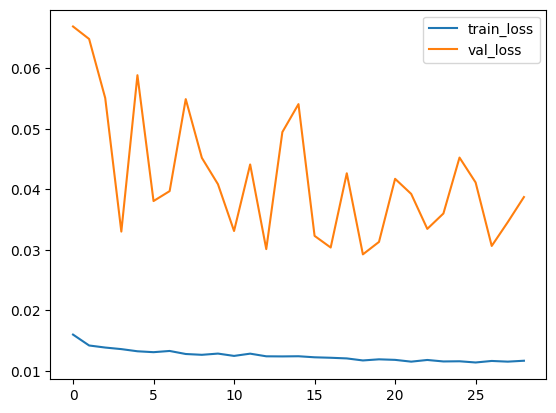

In [220]:
_ = log.plot()

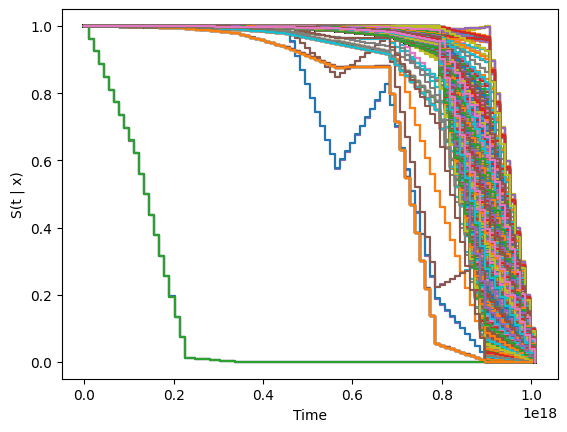

In [225]:
import matplotlib.pyplot as plt
surv = model.interpolate(10).predict_surv_df(x_test)
surv.iloc[:, :].plot(drawstyle='steps-post', legend=False)
plt.ylabel('S(t | x)')
_ = plt.xlabel('Time')

In [226]:
ev = EvalSurv(surv, durations_test, events_test.astype(int), censor_surv='km')

In [227]:
ev.concordance_td('antolini')

0.832835318732849

In [229]:
surv

,0,1,2,3,4,5,6,7,8,9,...,36527,36528,36529,36530,36531,36532,36533,36534,36535,36536
0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1.121664e+16,9.999373e-01,9.999638e-01,9.999724e-01,9.999619e-01,9.999676e-01,9.999362e-01,9.999480e-01,9.999589e-01,9.998418e-01,9.999512e-01,...,9.999550e-01,9.999459e-01,9.999450e-01,9.999473e-01,9.999600e-01,9.999547e-01,9.999408e-01,9.999530e-01,9.999474e-01,9.999364e-01
2.243328e+16,9.998745e-01,9.999276e-01,9.999447e-01,9.999237e-01,9.999353e-01,9.998724e-01,9.998961e-01,9.999179e-01,9.996836e-01,9.999024e-01,...,9.999101e-01,9.998919e-01,9.998901e-01,9.998947e-01,9.999200e-01,9.999093e-01,9.998815e-01,9.999059e-01,9.998947e-01,9.998729e-01
3.364992e+16,9.998118e-01,9.998914e-01,9.999171e-01,9.998856e-01,9.999030e-01,9.998087e-01,9.998441e-01,9.998769e-01,9.995255e-01,9.998535e-01,...,9.998651e-01,9.998378e-01,9.998352e-01,9.998420e-01,9.998800e-01,9.998640e-01,9.998223e-01,9.998589e-01,9.998421e-01,9.998093e-01
4.486656e+16,9.997491e-01,9.998552e-01,9.998896e-01,9.998474e-01,9.998707e-01,9.997449e-01,9.997922e-01,9.998358e-01,9.993673e-01,9.998047e-01,...,9.998201e-01,9.997838e-01,9.997802e-01,9.997893e-01,9.998400e-01,9.998187e-01,9.997631e-01,9.998119e-01,9.997895e-01,9.997457e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.646310e+17,1.377317e-01,2.142147e-01,2.305140e-01,2.135361e-01,2.063549e-01,1.343519e-01,1.833173e-01,1.990467e-01,1.146298e-01,1.871152e-01,...,1.982202e-01,1.784436e-01,1.771700e-01,2.002850e-01,2.135635e-01,2.042375e-01,1.685289e-01,1.945468e-01,1.855391e-01,1.582828e-01
9.758477e+17,1.032988e-01,1.606611e-01,1.728855e-01,1.601521e-01,1.547662e-01,1.007639e-01,1.374880e-01,1.492850e-01,8.597240e-02,1.403364e-01,...,1.486652e-01,1.338327e-01,1.328775e-01,1.502138e-01,1.601727e-01,1.531781e-01,1.263967e-01,1.459101e-01,1.391543e-01,1.187121e-01
9.870643e+17,6.886584e-02,1.071074e-01,1.152570e-01,1.067680e-01,1.031775e-01,6.717592e-02,9.165862e-02,9.952337e-02,5.731492e-02,9.355763e-02,...,9.911010e-02,8.922181e-02,8.858499e-02,1.001425e-01,1.067818e-01,1.021187e-01,8.426446e-02,9.727338e-02,9.276953e-02,7.914138e-02
9.982810e+17,3.443292e-02,5.355370e-02,5.762851e-02,5.338404e-02,5.158874e-02,3.358799e-02,4.582933e-02,4.976168e-02,2.865747e-02,4.677883e-02,...,4.955506e-02,4.461092e-02,4.429251e-02,5.007127e-02,5.339089e-02,5.105937e-02,4.213223e-02,4.863670e-02,4.638478e-02,3.957072e-02
